Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

## Librerías

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy import stats

# Estadística 
import scipy

In [88]:
df = pd.read_csv(r'C:\Users\nuria\OneDrive\Escritorio\Data Science\DS102024\3-MachineLearning\2-Supervisado\Ejercicios\PruebaTecnica\data\train.csv')
df.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,0.00,0.009,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,0.82,0.820,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,0.00,0.000,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,0.23,0.004,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


# 1. Análisis exploratorio de datos

In [89]:
df.shape

(5597, 22)

In [90]:
df.describe()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,0.324309,0.329693,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,0.328954,0.377353,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,0.000000,0.002000,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,0.230000,0.008000,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,0.610000,0.700000,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [4]:
summary_df = pd.DataFrame(columns=[
    'Nombre de la variable', 
    'Tipo de dato', 
    'Tipo de variable', 
    'Cardinalidad', 
    'Distribución', 
    'Valores faltantes (cantidad)', 
    'Valores faltantes (%)', 
    'Outliers (cantidad)', 
    'Outliers (%)', 
    'Rango de valores', 
    'Moda', 
    'Media', 
    'Mediana', 
    'Asimetría', 
    'Curtosis', 
    'Resultados de pruebas de normalidad'
])

def summarize_variable(col):
    data_type = col.dtype
    variable_type = 'numérica' if np.issubdtype(data_type, np.number) else 'categórica'
    cardinality = col.nunique()
    normality_test_result = 'N/A'

    if np.issubdtype(data_type, np.number):
        # Test de K-S
        d_statistic, p_value = stats.kstest(col.dropna(), 'norm', args=(col.mean(), col.std()))
        normality_test_result = 'Normal' if p_value > 0.05 else 'No normal'
        distribution = 'Gaussiana' if normality_test_result == 'Normal' else 'No gaussiana'
    else:
        distribution = 'Categórica'
    
    # Valores faltantes
    missing_count = col.isnull().sum()
    missing_percentage = missing_count / len(col) * 100
    
    # Outliers
    if np.issubdtype(data_type, np.number):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = col[(col < lower_bound) | (col > upper_bound)]
        outliers_count = outliers.count()
        outliers_percentage = outliers_count / len(col) * 100
    else:
        outliers_count = 0
        outliers_percentage = 0

    value_range = f"{col.min()} - {col.max()}" if np.issubdtype(data_type, np.number) else 'N/A'
    
    mode = col.mode()[0] if variable_type == 'categórica' else col.mode().values[0]
    mean = col.mean() if variable_type == 'numérica' else 'N/A'
    median = col.median() if variable_type == 'numérica' else 'N/A'
    skewness = col.skew() if variable_type == 'numérica' else 'N/A'
    kurtosis = col.kurtosis() if variable_type == 'numérica' else 'N/A'

    summary_df.loc[len(summary_df)] = [
        col.name, 
        data_type, 
        variable_type, 
        cardinality, 
        distribution, 
        missing_count, 
        missing_percentage, 
        outliers_count, 
        outliers_percentage, 
        value_range, 
        mode, 
        mean, 
        median, 
        skewness, 
        kurtosis, 
        normality_test_result
    ]

for column in df.columns:
    summarize_variable(df[column])

summary_df.set_index('Nombre de la variable', inplace=True)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evitar el truncado de filas

import IPython.display as display
display.display(summary_df)

,Tipo de dato,Tipo de variable,Cardinalidad,Distribución,Valores faltantes (cantidad),Valores faltantes (%),Outliers (cantidad),Outliers (%),Rango de valores,Moda,Media,Mediana,Asimetría,Curtosis,Resultados de pruebas de normalidad
Nombre de la variable,,,,,,,,,,,,,,,
ID,int64,numérica,5597,No gaussiana,0,0.0,0,0.000000,0 - 7993,0.000,3962.909952,3922.000,0.015842,-1.200866,No normal
col1,float64,numérica,479,No gaussiana,0,0.0,1220,21.797391,0.0 - 5.05,0.090,0.674797,0.070,1.997938,2.658457,No normal
col2,float64,numérica,2320,No gaussiana,0,0.0,0,0.000000,-0.08 - 29.84,0.370,14.438840,14.390,0.005050,-1.226148,No normal
col3,float64,numérica,107,No gaussiana,0,0.0,1154,20.618188,0.0 - 1.05,0.040,0.163603,0.050,1.955333,2.545491,No normal
col4,float64,numérica,470,No gaussiana,0,0.0,0,0.000000,0.0 - 4.94,0.230,1.579702,1.210,0.639019,-0.754380,No normal
col5,float64,numérica,23,No gaussiana,0,0.0,0,0.000000,0.0 - 0.13,0.060,0.042747,0.040,0.481603,-0.981251,No normal
col6,float64,numérica,784,No gaussiana,0,0.0,0,0.000000,0.0 - 8.66,0.090,2.213093,0.550,0.860083,-0.743854,No normal
col7,float64,numérica,91,No gaussiana,0,0.0,0,0.000000,0.0 - 0.9,0.060,0.250890,0.090,1.003708,-0.434397,No normal
col8,float64,numérica,201,No gaussiana,0,0.0,0,0.000000,0.0 - 2.0,0.050,0.807654,0.750,0.250723,-1.350580,No normal


### Observaciones:
- El conjunto de datos se compone de 5597 filas y 22 columnas (variables)
- Todos los datos son numéricos
- Distribución no gaussiana
- No hay valores faltantes
- Existen outliers en las columnas col 1 y col 3
- La columna 'col 2' tiene valores negativos
- Ninguna de las columnas tiene una distribución normal

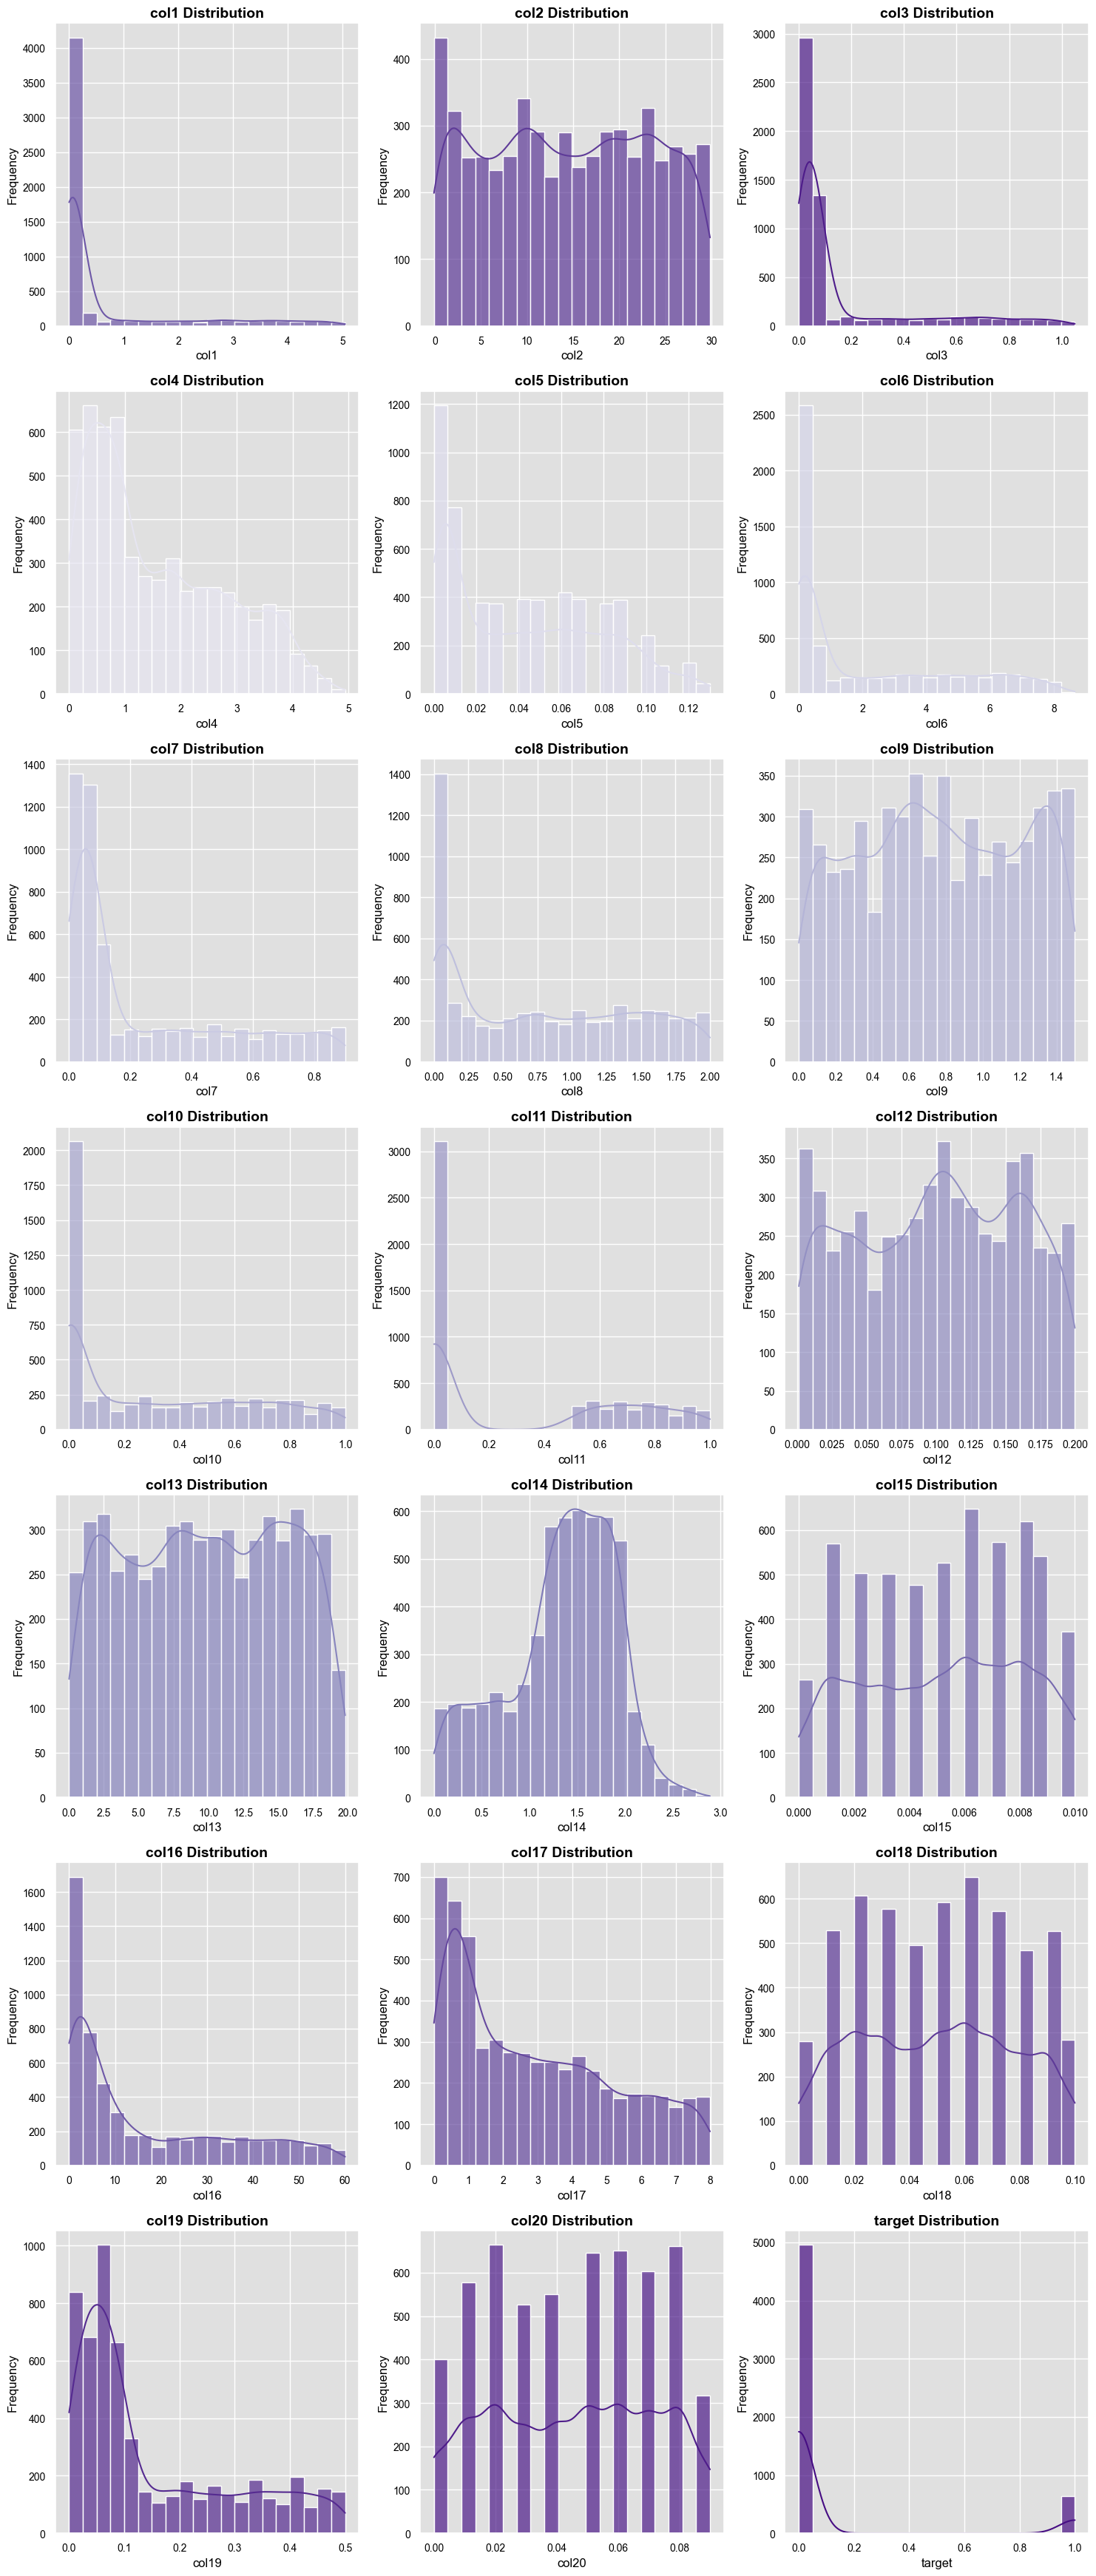

In [ ]:
import warnings
warnings.filterwarnings("ignore")

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns # Columnas numéricas
numerical_columns = [col for col in numerical_columns if col.lower() != 'id'] 

sns.set(style="darkgrid")

num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()
colors = sns.color_palette("Purples", num_cols)

dark_colors = sns.color_palette("Purples", 10)[7:10]  
colors[:3] = dark_colors

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=20, color=colors[i], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, color='black')
    axes[i].set_ylabel('Frequency', fontsize=12, color='black')
    axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[i].set_facecolor('#e0e0e0')  # Gris claro para el fondo

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

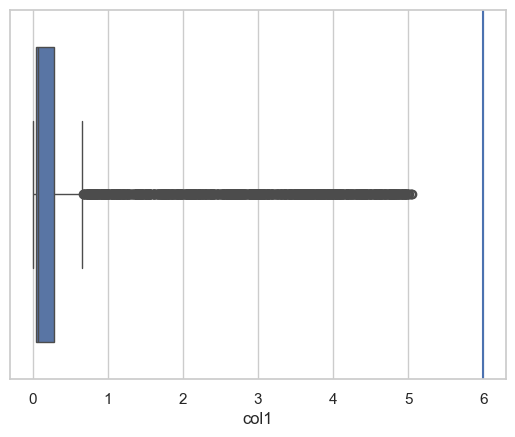

In [14]:
sns.boxplot(data = df, x='col1')
plt.axvline(x=6);

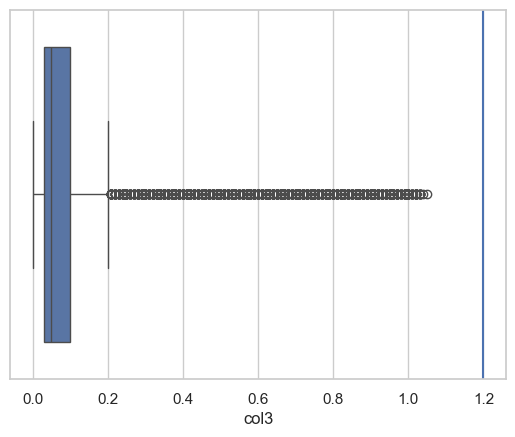

In [19]:
sns.boxplot(data = df, x='col3')
plt.axvline(x=1.2);

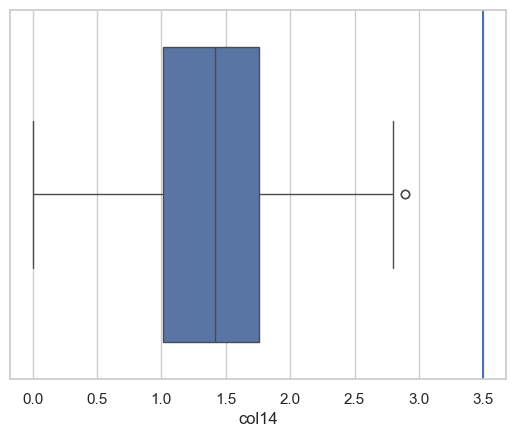

In [22]:
sns.boxplot(data = df, x='col14')
plt.axvline(x=3.5);

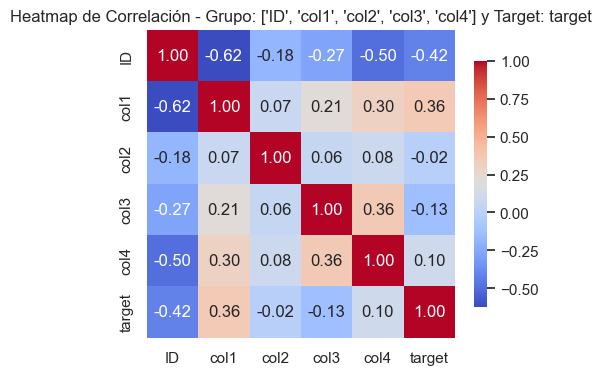

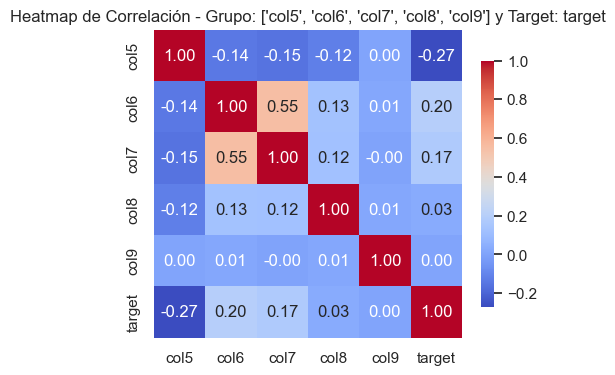

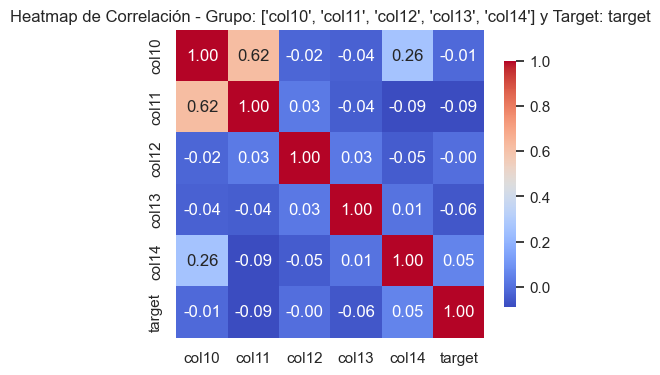

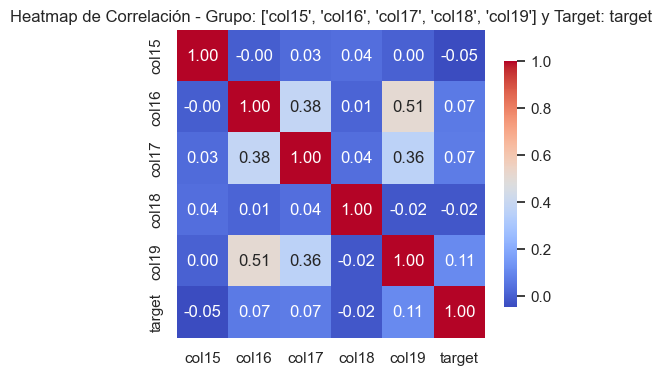

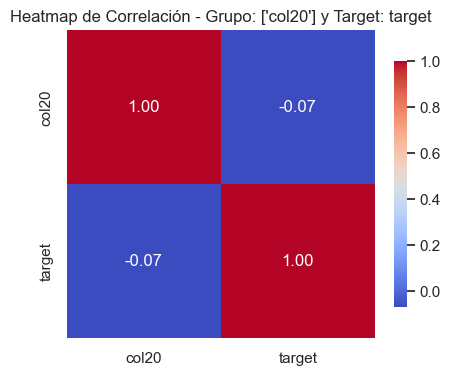

In [ ]:
target_column = df.columns[-1]  # La target es la última columna

# Divido las columnas en grupos de 5 (excluyendo la target)
grouped_columns = [df.columns[i:i + 5].tolist() for i in range(0, len(df.columns) - 1, 5)]

# Crear heatmaps para cada grupo de columnas
for group in grouped_columns:
    if target_column not in group:
        group.append(target_column) 

    # Matriz de correlación para el grupo
    correlation_matrix = df[group].corr()
    plt.figure(figsize=(5, 4))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title(f'Heatmap de Correlación - Grupo: {group[:-1]} y Target: {target_column}')
    plt.show()


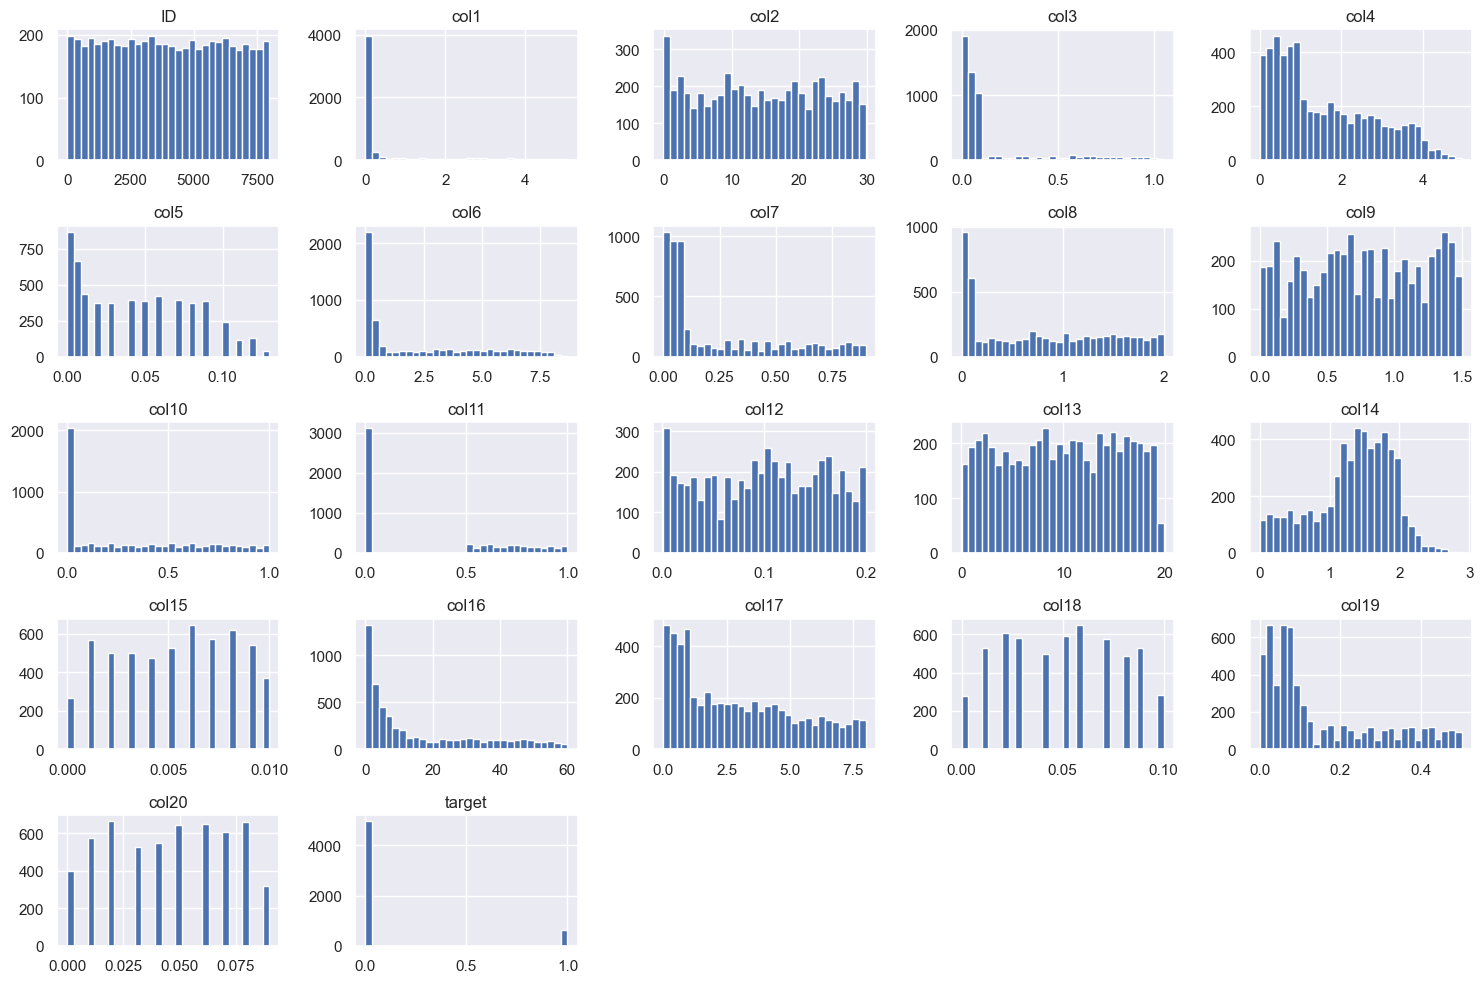

In [91]:
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

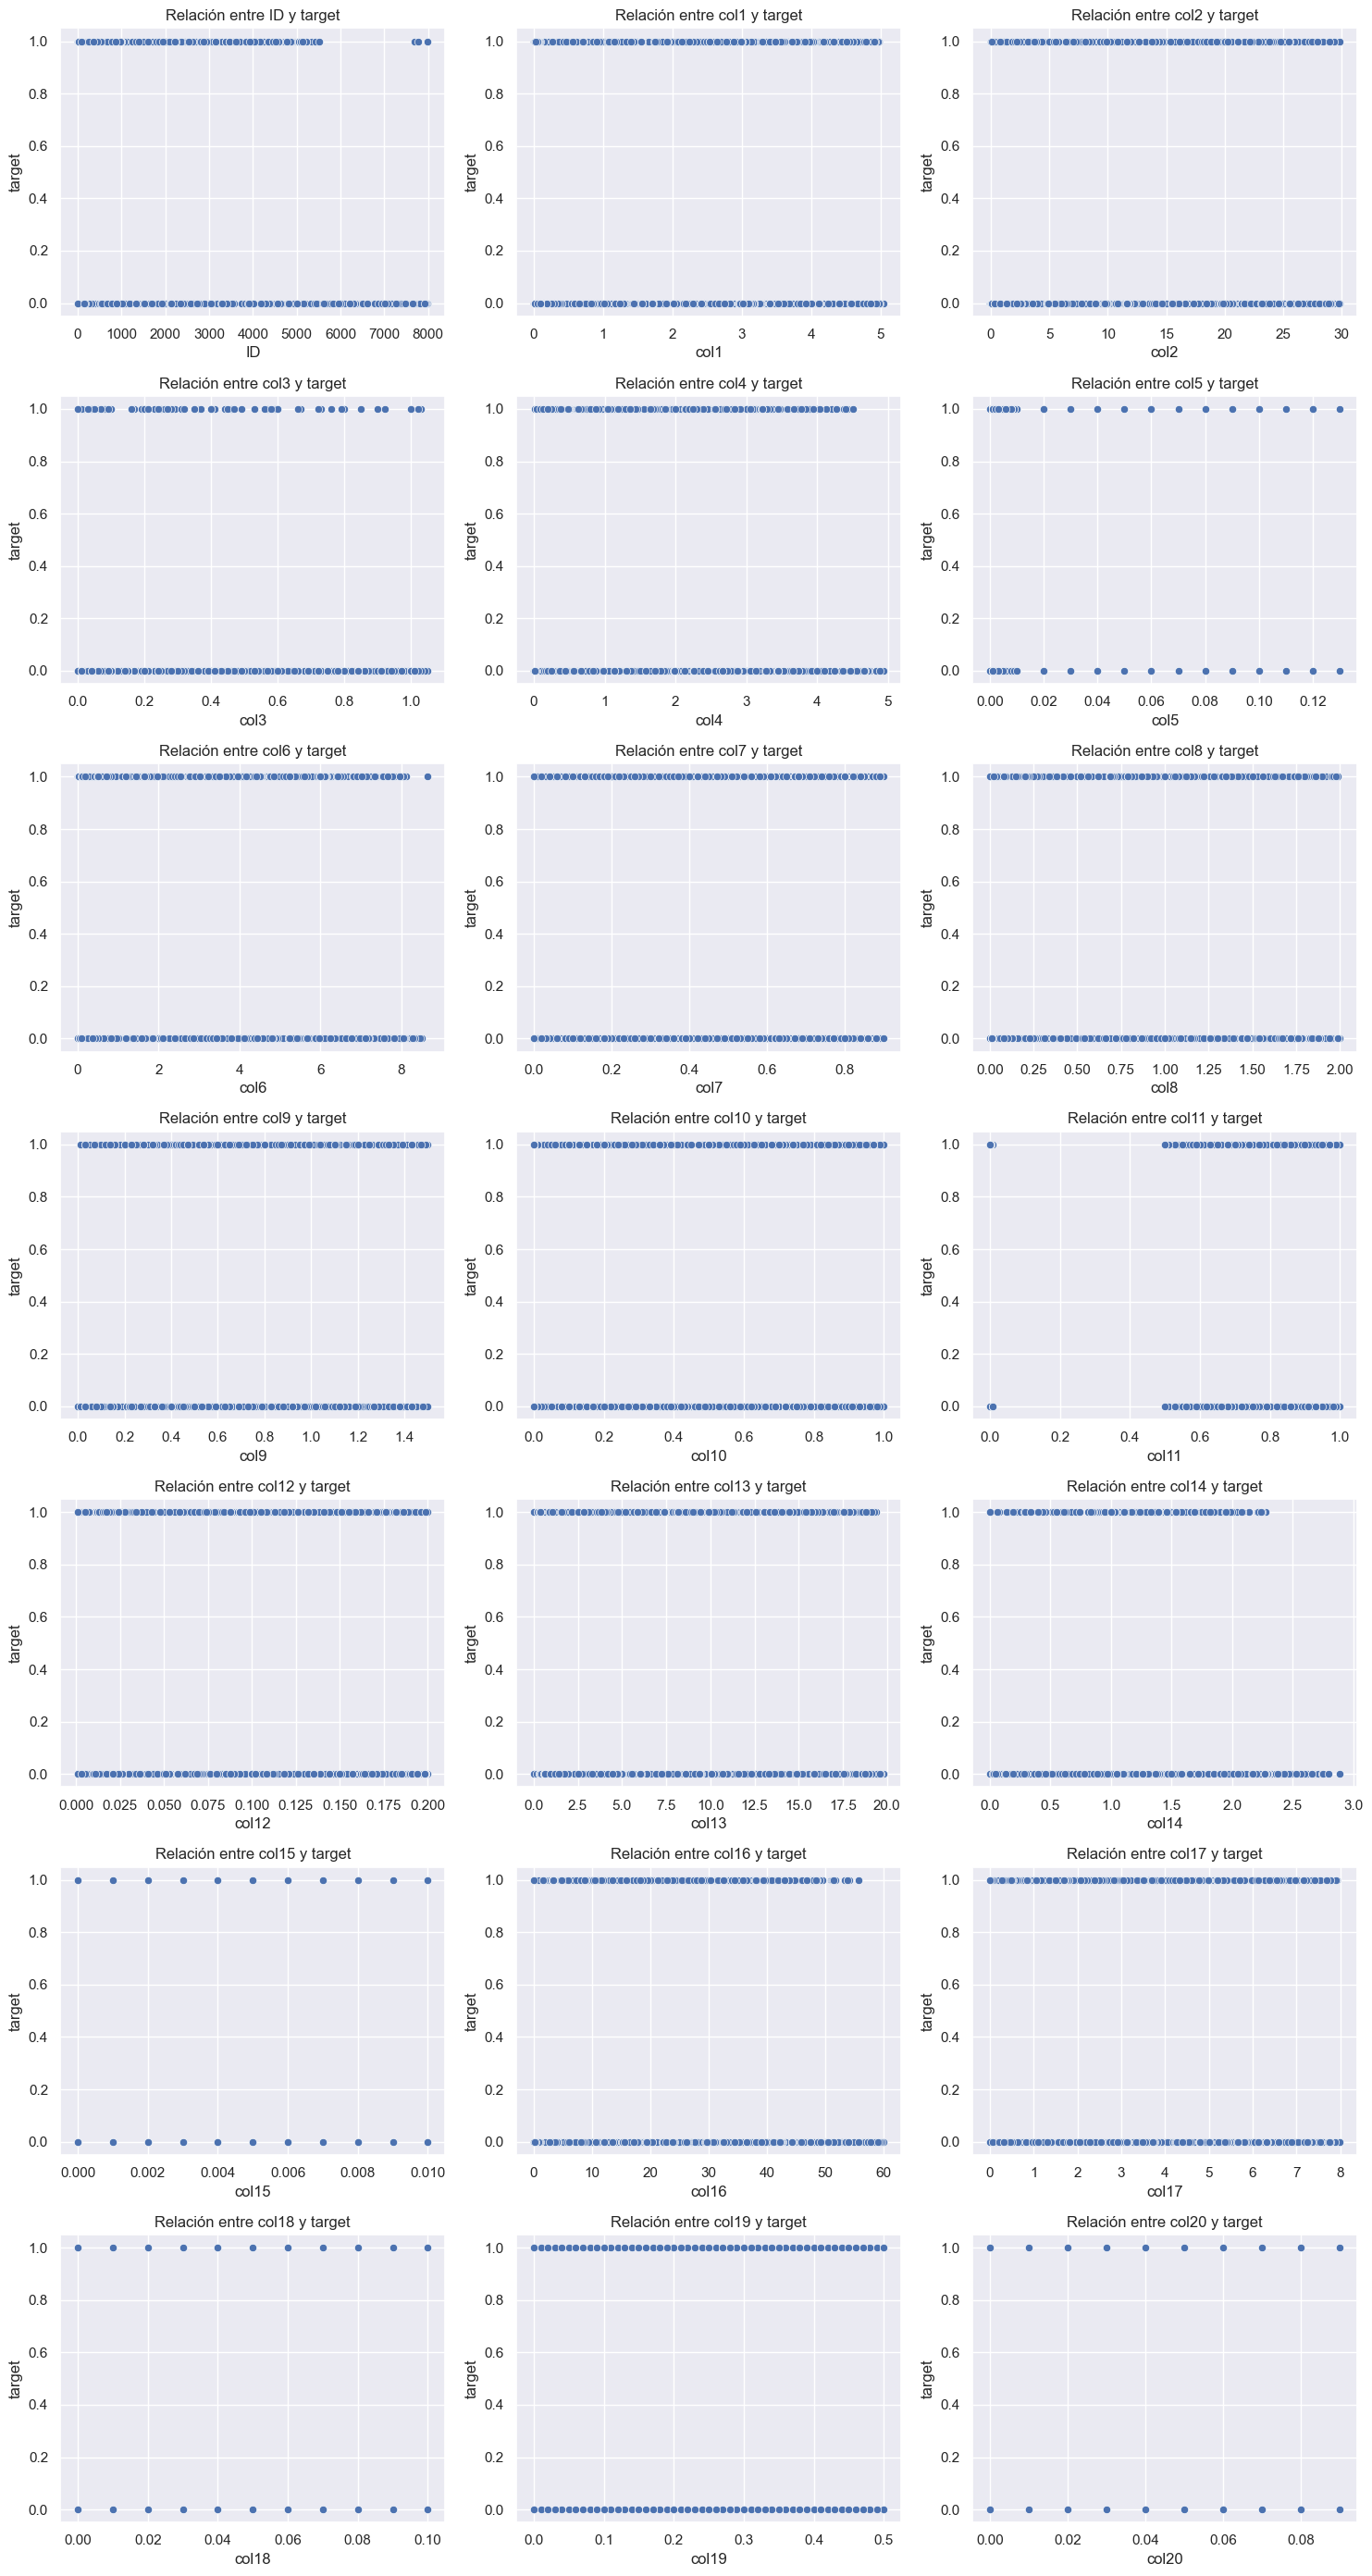

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('target')
n_cols = 3  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() 

for ax, col in zip(axes, numeric_cols):
    sns.scatterplot(data=df, x=col, y='target', ax=ax)
    ax.set_title(f'Relación entre {col} y target')
    ax.set_xlabel(col)
    ax.set_ylabel('target')

for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### Observaciones: 
- Las columnas que más correlación tienen con la target son ID, col1, col5, col6 y col7
- Hay muchísimos outliers en la columna 3 y más aun en la columna 1 (la columna 1 tiene una correlación relativamente alta con la target por lo que puede ser significativa para la predicción) 

# 2. Procesamiento de datos

1. Imputación de outliers

In [39]:
moda_col14 = df['col14'].mode()[0]
moda_col14

np.float64(1.36)

In [40]:
# Imputar la moda a los valores mayores que 2.5
df['col14'] = df['col14'].apply(lambda x: moda_col14 if x > 2.5 else x)

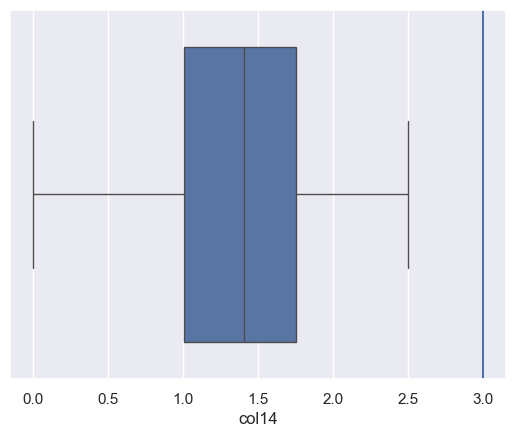

In [44]:
# Comprobamos que ya no aparezca el outlyer
sns.boxplot(data = df, x='col14')
plt.axvline(x=3);

In [53]:
# Escalar las variables numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns='target'))

# Convertir el ndarray de vuelta a un DataFrame
df2 = pd.DataFrame(df_scaled, columns=df.columns[:-1])  # La última columna es 'target'

In [54]:
df2.to_csv('Datos_escalados.csv', index=False)

# 3. Creación de un modelo de línea base (Baseline)

## Machine Learning

In [66]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [55]:
df2.head(2)

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,0.446614,-0.514146,1.396693,-0.289051,-0.188109,0.478324,-0.822581,-0.590534,1.781612,1.635999,-0.985969,-0.849925,-1.190695,-0.053620,-0.865494,-1.417113,-0.867612,-0.847348,1.401511,-0.484576,1.299885
1,-0.975329,0.357425,-1.185139,0.614198,1.941100,-0.353417,0.948041,1.134567,1.658990,1.361020,1.507004,1.299450,1.206208,0.718602,-0.309995,0.272183,-0.342462,0.355847,-1.026944,2.082060,0.557112


Random ForestClassifier

In [57]:
#X = df[['col1', 'col5', 'col6', 'col7']] # Primera predicción (0.92678 de accuracy)
X = df2[['col1','col3', 'col4', 'col5', 'col6', 'col7', 'col11', 'col19']]
y = df['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

SVM

In [67]:
X = df2[['col1', 'col3', 'col4', 'col5', 'col6', 'col7', 'col11', 'col19']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

# 4. Evaluación del modelo:

RandomForestModel

In [64]:
# Predecir y evaluar el modelo de random forest
y_pred = random_forest.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9223214285714286
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       992
           1       0.69      0.58      0.63       128

    accuracy                           0.92      1120
   macro avg       0.82      0.77      0.79      1120
weighted avg       0.92      0.92      0.92      1120



In [65]:
# RMSE del modelo: Random Forest
predictions = random_forest.predict(X_test)
rmse = root_mean_squared_error(y_test, predictions)
print('RMSE:', rmse)

RMSE: 0.27870875735895245


SVM

In [70]:
# Realizar predicciones y evaluar el modelo
y_pred = svm_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9160714285714285
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       992
           1       0.66      0.55      0.60       128

    accuracy                           0.92      1120
   macro avg       0.80      0.76      0.78      1120
weighted avg       0.91      0.92      0.91      1120



In [72]:
predictions2 = svm_model.predict(X_test)
rmse2 = root_mean_squared_error(y_test, predictions2)
print('RMSE:', rmse2)

RMSE: 0.28970428272390353


# 5. Selección del modelo:

Según los modelos evaluados, se ha llegado a la conclusión de que el modelo de Random Forest es el más adecuado para realizar las predicciones. Esta decisión se basa en su capacidad para manejar diferentes tipos de datos de manera efectiva y en su habilidad para evitar errores comunes que pueden afectar otros modelos. Además, Random Forest permite entender mejor qué factores influyen en los resultados. Por lo tanto, se considera que este modelo es la mejor opción para el análisis en cuestión.

In [77]:
df2.head(3)

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,0.446614,-0.514146,1.396693,-0.289051,-0.188109,0.478324,-0.822581,-0.590534,1.781612,1.635999,-0.985969,-0.849925,-1.190695,-0.053620,-0.865494,-1.417113,-0.867612,-0.847348,1.401511,-0.484576,1.299885
1,-0.975329,0.357425,-1.185139,0.614198,1.941100,-0.353417,0.948041,1.134567,1.658990,1.361020,1.507004,1.299450,1.206208,0.718602,-0.309995,0.272183,-0.342462,0.355847,-1.026944,2.082060,0.557112
2,1.671232,-0.474886,-0.721878,-0.485409,-1.179010,-0.076170,-0.834205,-0.700647,-1.161311,-1.755418,-0.985969,-0.873778,0.344012,-1.291683,0.353021,0.947901,-0.704596,-1.143849,-0.680022,-0.831418,-1.299818


In [79]:
# Predicción con Random Forest y todas las columnas
X = df2[['col1','col2','col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10','col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20']]
y = df['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
random_forest2 = RandomForestClassifier(random_state=42)
random_forest2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Predecir y evaluar el modelo de random forest
y_pred = random_forest2.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9544642857142858
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       992
           1       0.93      0.65      0.76       128

    accuracy                           0.95      1120
   macro avg       0.94      0.82      0.87      1120
weighted avg       0.95      0.95      0.95      1120



In [81]:
# RMSE del modelo: Random Forest
predictions = random_forest2.predict(X_test)
rmse = root_mean_squared_error(y_test, predictions)
print('RMSE:', rmse)

RMSE: 0.21339098923270935


# 6. Predicción:

In [82]:
data_pred = pd.read_csv(r"C:\Users\nuria\OneDrive\Escritorio\Data Science\DS102024\3-MachineLearning\2-Supervisado\Ejercicios\PruebaTecnica\data\test.csv")
data_pred.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,2816,0.06,25.18,0.04,0.04,0.001,5.10,0.86,1.23,0.52,0.62,0.620,0.022,12.63,1.93,0.003,1.19,7.79,0.04,0.43,0.01
1,3641,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.09,1.21,0.73,0.730,0.001,4.49,1.95,0.009,52.30,1.00,0.10,0.12,0.01
2,7191,0.09,1.10,0.07,0.73,0.050,0.10,0.01,1.44,1.42,0.31,0.007,0.177,1.03,1.27,0.002,7.04,0.38,0.06,0.05,0.06
3,5199,0.07,11.23,0.04,1.22,0.030,0.16,0.03,1.18,0.88,0.00,0.001,0.032,4.07,0.98,0.003,1.28,0.51,0.06,0.03,0.07
4,7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [83]:
data_pred.shape

(2399, 21)

In [84]:
data_pred= data_pred[['col1','col2','col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10','col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20']]
data_pred.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,0.06,25.18,0.04,0.04,0.001,5.10,0.86,1.23,0.52,0.62,0.620,0.022,12.63,1.93,0.003,1.19,7.79,0.04,0.43,0.01
1,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.09,1.21,0.73,0.730,0.001,4.49,1.95,0.009,52.30,1.00,0.10,0.12,0.01
2,0.09,1.10,0.07,0.73,0.050,0.10,0.01,1.44,1.42,0.31,0.007,0.177,1.03,1.27,0.002,7.04,0.38,0.06,0.05,0.06
3,0.07,11.23,0.04,1.22,0.030,0.16,0.03,1.18,0.88,0.00,0.001,0.032,4.07,0.98,0.003,1.28,0.51,0.06,0.03,0.07
4,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [87]:
prediccion= random_forest2.predict(data_pred)
prediccion

array([0, 0, 0, ..., 0, 0, 0])